# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

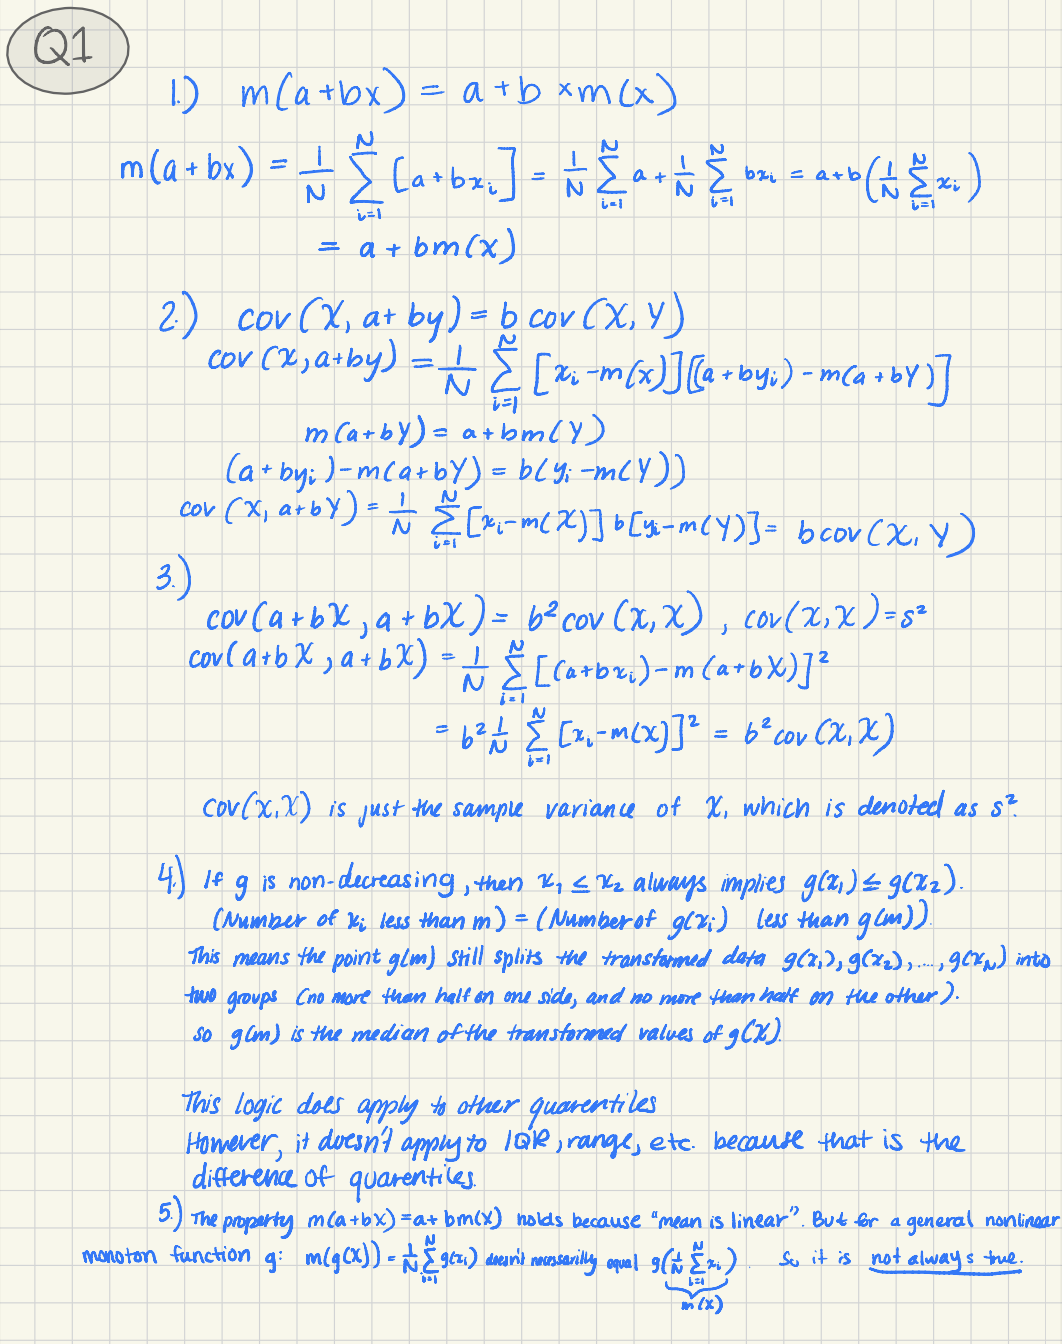

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Load the dataset
df = pd.read_csv('./data/ForeignGifts_edu.csv')

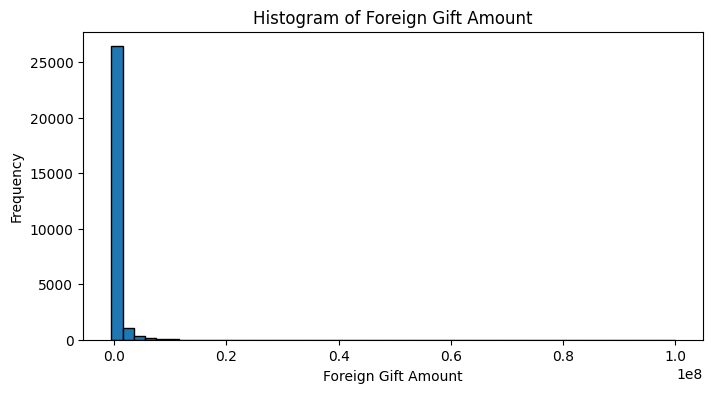

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [2]:
#2. For Foreign Gift Amount, create a histogram and describe the variable
plt.figure(figsize=(8,4))
plt.hist(df['Foreign Gift Amount'], bins=50, edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

print(df['Foreign Gift Amount'].describe())

- Most gifts are relatively small amounts, all crowded near zero on the x‐axis.
- There’s a long right tail: a small number of observations extend all the way up to around 10^8.
- Very strong right skew: the distribution is heavily concentrated at the lower end, and only a tiny fraction of gifts are extremely large.

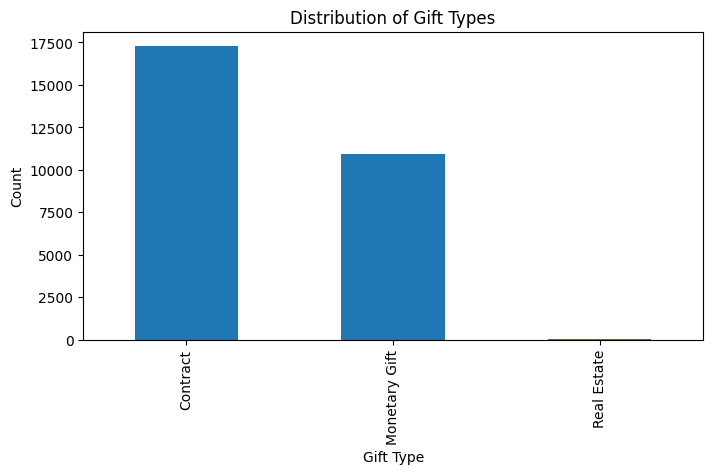

Gift Type Counts:
 Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type Proportions:
 Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


In [3]:
#3. For Gift Type, create a histogram (or bar plot) or use value_counts(). Then compute proportions of each gift type.
plt.figure(figsize=(8,4))
df['Gift Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Gift Types')
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.show()

#just see the counts in text form:
gift_type_counts = df['Gift Type'].value_counts()
gift_type_proportions = gift_type_counts / gift_type_counts.sum()
print("Gift Type Counts:\n", gift_type_counts)
print("Gift Type Proportions:\n", gift_type_proportions)

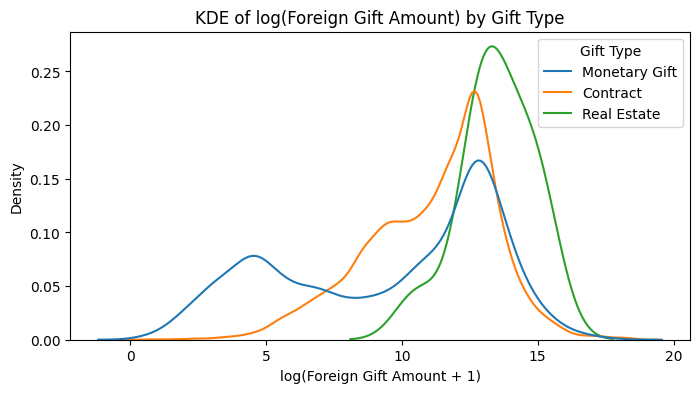

In [4]:
#4.
# Convert to numeric
df["Foreign Gift Amount"] = pd.to_numeric(df["Foreign Gift Amount"], errors="coerce")

# Remove rows with NaN or negative amounts
df = df.dropna(subset=["Foreign Gift Amount"])
df = df[df["Foreign Gift Amount"] >= 0]

# Log-transform safely
df["log_Foreign_Gift_Amount"] = np.log1p(df["Foreign Gift Amount"])  # same as log(x+1)

# Plot
plt.figure(figsize=(8,4))
sns.kdeplot(
    data=df,
    x="log_Foreign_Gift_Amount",
    hue="Gift Type",
    common_norm=False
)
plt.title("KDE of log(Foreign Gift Amount) by Gift Type")
plt.xlabel("log(Foreign Gift Amount + 1)")
plt.show()

In [5]:
#5. Top 15 countries by number of gifts AND by total amount of gifts
country_counts = df.groupby('Country of Giftor').size().sort_values(ascending=False)
print("Top 15 Countries by Number of Gifts:\n", country_counts.head(15))

country_sums = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print("Top 15 Countries by Total Amount:\n", country_sums.head(15))


Top 15 Countries by Number of Gifts:
 Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Top 15 Countries by Total Amount:
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464933703
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    656325544
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442484396
UNITED ARAB EMIRATES     431396357
FRANCE                   405925834
SINGAPORE                401157692
AUSTRALIA                248

Top 15 Institutions by Total Amount:
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


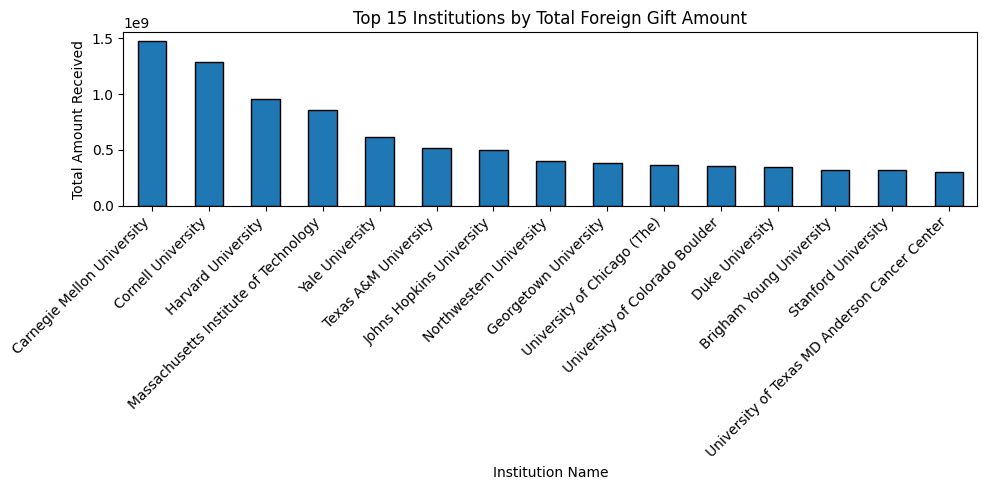

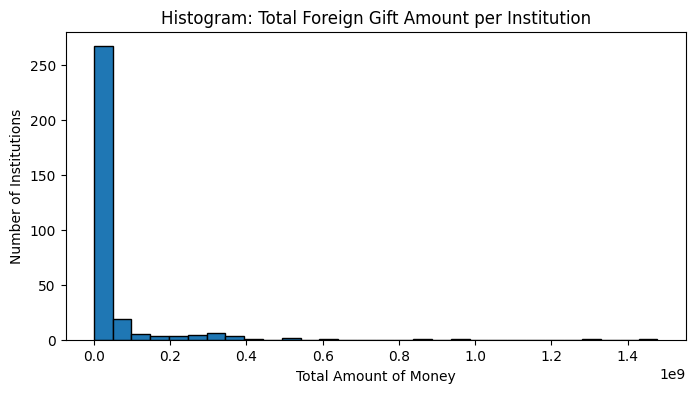

In [6]:
#6. Top 15 institutions by total amount received; histogram of total amounts
institution_sums = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
top15_institutions = institution_sums.sort_values(ascending=False).head(15)
print("Top 15 Institutions by Total Amount:\n", top15_institutions)

#Compute total amounts per institution
institution_sums = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

top15_institutions = institution_sums.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
top15_institutions.plot(kind='bar', edgecolor='black')
plt.title('Top 15 Institutions by Total Foreign Gift Amount')
plt.xlabel('Institution Name')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45, ha='right')  # rotate labels if needed
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.hist(institution_sums, bins=30, edgecolor='black')
plt.title('Histogram: Total Foreign Gift Amount per Institution')
plt.xlabel('Total Amount of Money')
plt.ylabel('Number of Institutions')
plt.show()




In [7]:
#7. Which giftors provide the most money, in total?
giftor_sums = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print("Giftors providing the most total money:\n", giftor_sums.head(15))


Giftors providing the most total money:
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Load the data
df = pd.read_csv("./data/airbnb_hw.csv")

In [9]:
#2. Dimensions and initial look
print("Shape of the dataset:", df.shape)  # (num_rows, num_columns)
print("\nColumn names:", df.columns.tolist())

print("\nFirst 5 rows of the dataset:")
print(df.head())


Shape of the dataset: (30478, 13)

Column names: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

First 5 rows of the dataset:
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment

In [10]:
#3. Cross-tabulate Room Type and Property Type
room_property_ct = pd.crosstab(df["Room Type"], df["Property Type"])
print("\nCross-tab: Room Type vs. Property Type")
print(room_property_ct)



Cross-tab: Room Type vs. Property Type
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14   

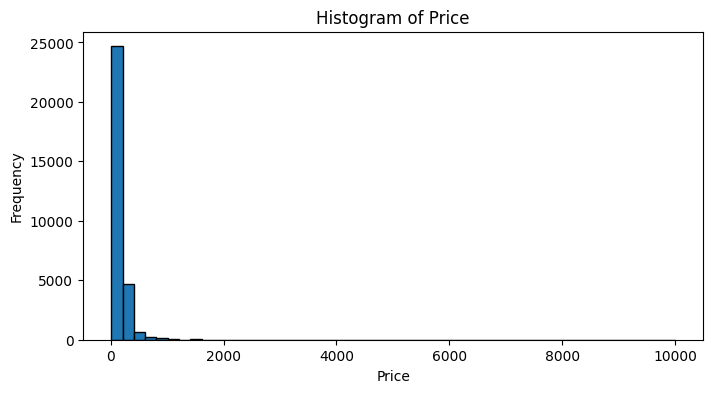

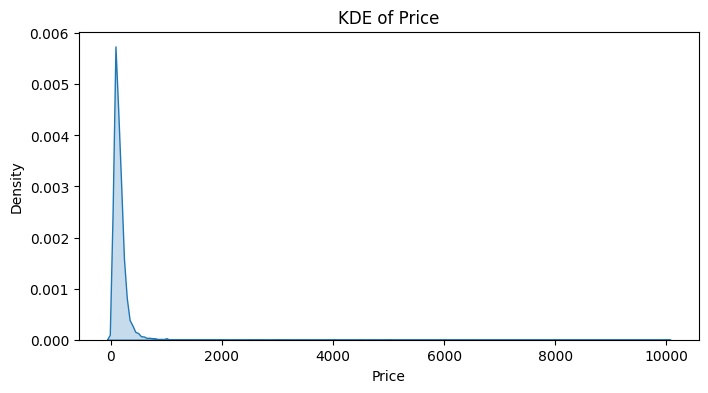

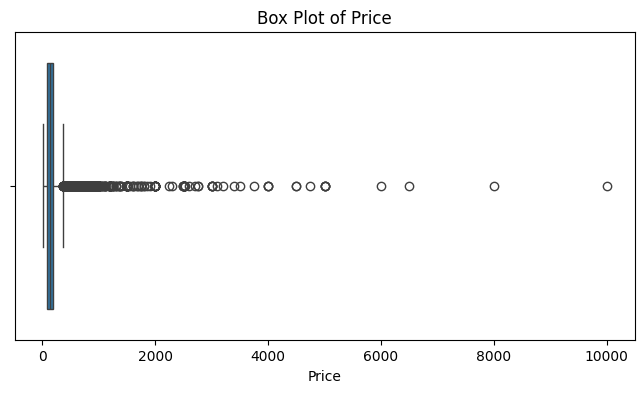


Statistical description of 'Price':
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


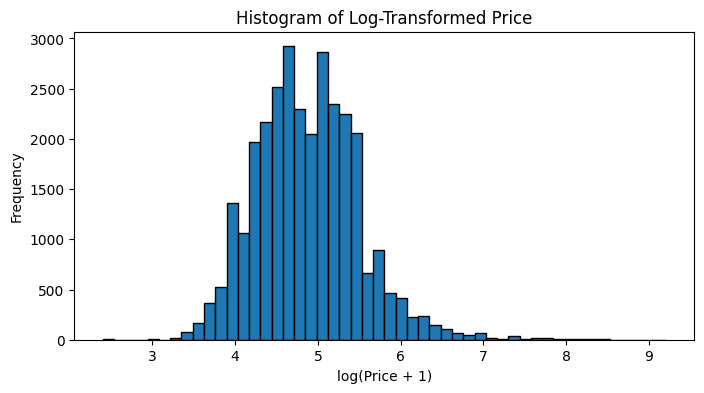

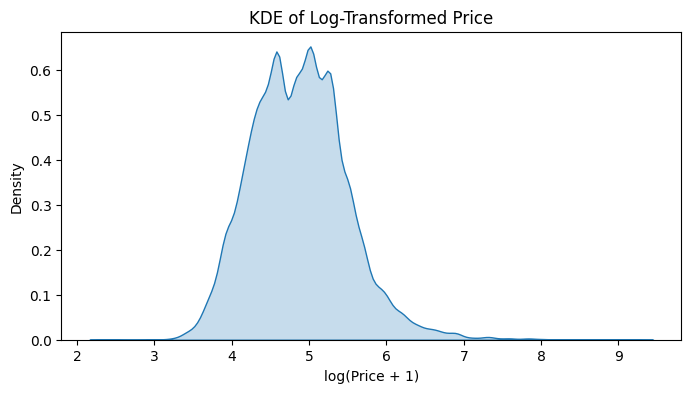

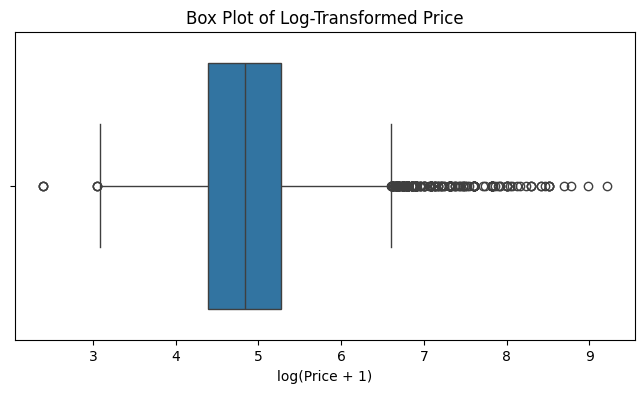


Statistical description of 'price_log':
count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: price_log, dtype: float64


In [11]:
#4. Visualize and describe 'Price'


df["Price"] = df["Price"].astype(str)  # ensure it's string so we can do replace
df["Price"] = df["Price"].str.replace("$", "", regex=True)
df["Price"] = df["Price"].str.replace(",", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")  # convert to float, NaN if invalid

# 2) Histogram of Price
plt.figure(figsize=(8,4))
plt.hist(df["Price"].dropna(), bins=50, edgecolor="black")
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 3) Kernel density plot of Price
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x="Price", fill=True)
plt.title("KDE of Price")
plt.xlabel("Price")
plt.show()

# 4) Box plot of Price
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Price"])
plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.show()

# 5) Statistical Description of Price
print("\nStatistical description of 'Price':")
print(df["Price"].describe())

# 6) Log-transform the Price
#    +1 prevents errors if Price = 0
df["price_log"] = np.log(df["Price"] + 1)

# 7) Repeat the visuals for price_log
plt.figure(figsize=(8,4))
plt.hist(df["price_log"].dropna(), bins=50, edgecolor="black")
plt.title("Histogram of Log-Transformed Price")
plt.xlabel("log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x="price_log", fill=True)
plt.title("KDE of Log-Transformed Price")
plt.xlabel("log(Price + 1)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["price_log"])
plt.title("Box Plot of Log-Transformed Price")
plt.xlabel("log(Price + 1)")
plt.show()

print("\nStatistical description of 'price_log':")
print(df["price_log"].describe())

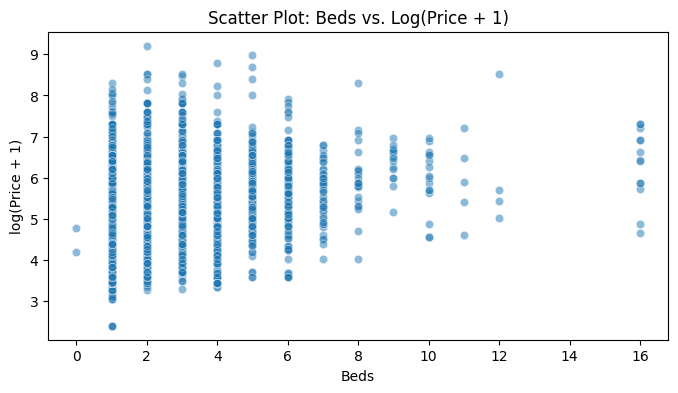


Description of 'Price' grouped by 'Beds':
        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.2

In [12]:
#5. Scatter plot of price_log vs. Beds + groupby
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df, 
    x="Beds", 
    y="price_log",
    alpha=0.5
)
plt.title("Scatter Plot: Beds vs. Log(Price + 1)")
plt.xlabel("Beds")
plt.ylabel("log(Price + 1)")
plt.show()

#Grouped Description of Price by Beds
beds_group_desc = df.groupby("Beds")["Price"].describe()
print("\nDescription of 'Price' grouped by 'Beds':")
print(beds_group_desc)


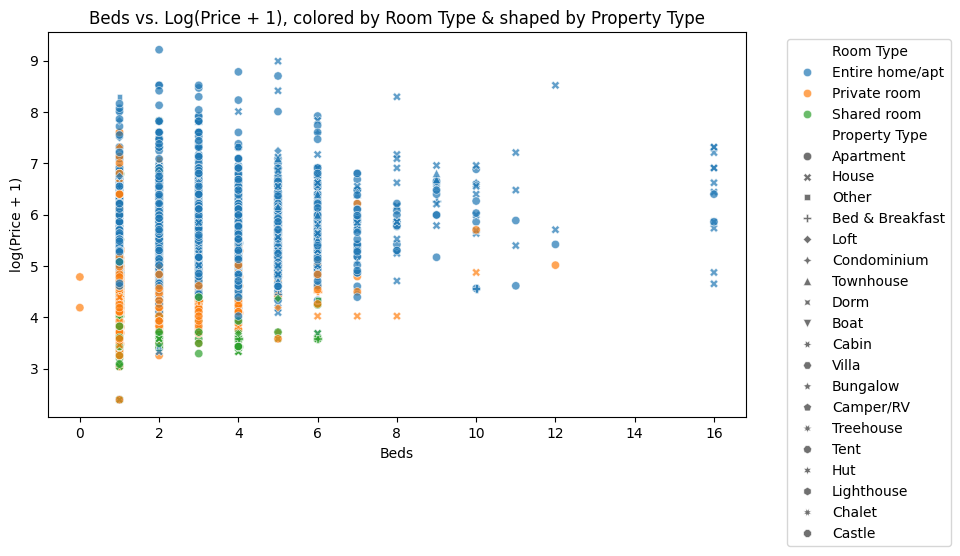


'Price' description by Room Type and Property Type:
                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               

In [13]:
#6. Scatter plot colored by Room Type and shaped by Property Type
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x="Beds",
    y="price_log",
    hue="Room Type",
    style="Property Type",
    alpha=0.7
)
plt.title("Beds vs. Log(Price + 1), colored by Room Type & shaped by Property Type")
plt.xlabel("Beds")
plt.ylabel("log(Price + 1)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

room_property_desc = df.groupby(["Room Type", "Property Type"])["Price"].describe()
print("\n'Price' description by Room Type and Property Type:")
print(room_property_desc)


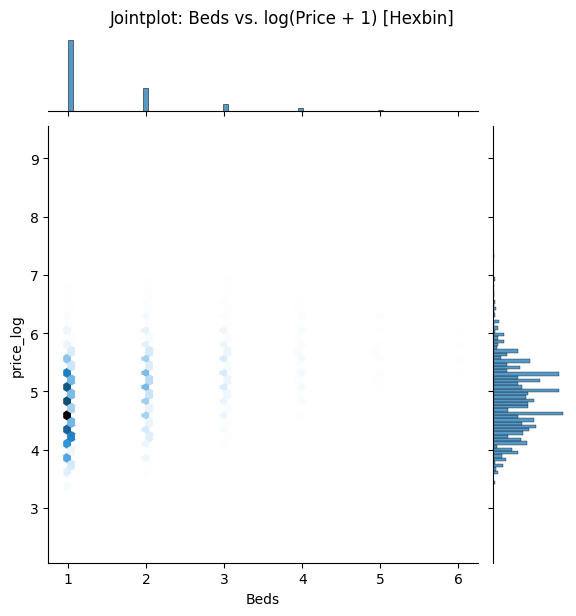

In [14]:
#7. Jointplot (hex) of Beds and price_log

# Drop NaNs and unrealistic bed counts
df_clean = df.dropna(subset=["Beds", "price_log"]).copy()
df_clean = df_clean[df_clean["Beds"].between(1, 6)]  # limit to 1–6 beds

g = sns.jointplot(
    data=df_clean,
    x="Beds",
    y="price_log",
    kind="hex",
    height=6
)
g.fig.suptitle("Jointplot: Beds vs. log(Price + 1) [Hexbin]", y=1.02)
plt.show()

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.